## Components of PCA

When we run PCA, we get back the following:

- Principal components (PCs): The PCs are the linear combinations of the features.
- Explained variance ratio: The explained variance ratio tells us how much variance is explained by each PC.
- Feature weights: The feature weights tell us how much each feature contributes to each PC.


In [3]:
from sklearn.cluster import KMeans
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

dataset = sklearn.datasets.load_iris(as_frame=True)
# Run PCA on all of the Iris dataset
pca = PCA()

X_all = (dataset
     ['data']
     #.loc[:, ['sepal length (cm)', 'sepal width (cm)']]
)
pca.fit(X_all)
X_pca = pca.transform(X_all)

In [9]:
X_all

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# tell sklearn to output pandas dataframes
sklearn.set_config(transform_output='pandas')

pca.transform(X_all)

,pca0,pca1,pca2,pca3
0,-2.684126,0.319397,-0.027915,0.002262
1,-2.714142,-0.177001,-0.210464,0.099027
2,-2.888991,-0.144949,0.017900,0.019968
3,-2.745343,-0.318299,0.031559,-0.075576
4,-2.728717,0.326755,0.090079,-0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,0.426196
146,1.527167,-0.375317,-0.121898,0.254367
147,1.764346,0.078859,0.130482,0.137001
148,1.900942,0.116628,0.723252,0.044595


In [5]:
# I don't like the column names, so I'll rename them
# change pca0 to PC1, pca1 to PC2, etc

def rename_pc0_to_PC1(col):
    num = int(col[3:]) + 1
    return 'PC' + str(num)

pca.transform(X_all).rename(columns=rename_pc0_to_PC1)


,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,0.002262
1,-2.714142,-0.177001,-0.210464,0.099027
2,-2.888991,-0.144949,0.017900,0.019968
3,-2.745343,-0.318299,0.031559,-0.075576
4,-2.728717,0.326755,0.090079,-0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,0.426196
146,1.527167,-0.375317,-0.121898,0.254367
147,1.764346,0.078859,0.130482,0.137001
148,1.900942,0.116628,0.723252,0.044595


Text(0.5, 1.0, 'Scree Plot')

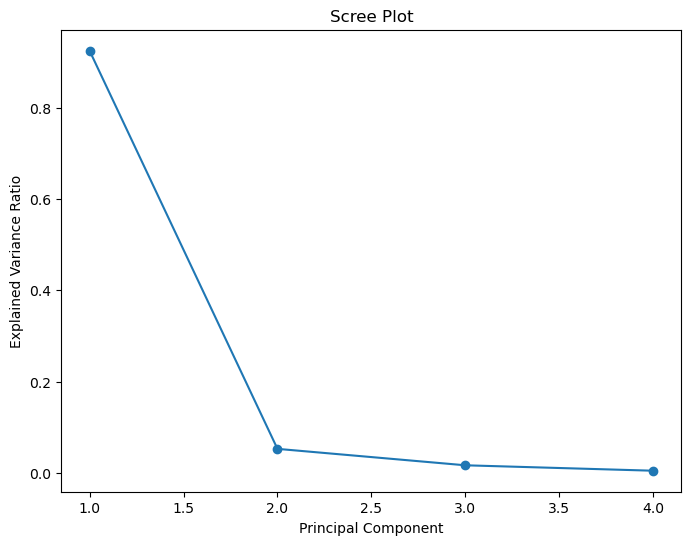

In [6]:
# Scree plot of explained variance
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Scree Plot')

In [7]:
# The explained variance ratio is the percentage of variance explained by each of the selected components.
# The first principal component explains 92.5% of the variance in the data, and
# the second principal component explains 5.3% of the variance in the data.
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [8]:
pca.explained_variance_ratio_.cumsum()

array([0.92461872, 0.97768521, 0.99478782, 1.        ])